In [6]:
import matplotlib.pyplot as plt
import numpy as np

with open('results/ccsd_res.npy', 'rb') as f:
    ccsd_res = np.load(f)

with open('results/fci_res.npy', 'rb') as f:
    fci_res = np.load(f)

In [7]:
sqd_energies = [
    -3687.9345710054695,
    -3687.9351576701447,
    -3688.0474531389355,
    -3688.0557819044852,
    -3688.0724082333636,
    -3688.1809029056367,
    
]
norbs = [4, 6, 8,10, 12, 14]
subspace_dim = [
    1,
    25,
    4900,
    25281,
    243049,
    619369,
]
depth = [
    72,
    112,
    146,
    182,
    216,
    256,
]

In [11]:
sqd_energies_hardware = [
   -3687.934656831271,
   -3687.9366424495233,
   -3688.047925427873,
   -3688.0559795388735,
   -3688.072497093222,
   -3688.1431752639014
]
times = [4, 4, 4, 5, 5, 5]
depth_hardware = [
    161,
    289,
    321,
    467,
    471,
    756
]

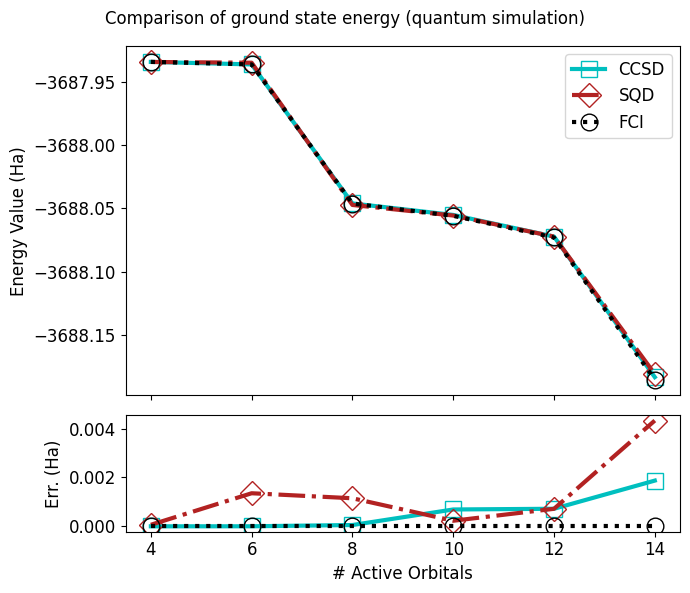

In [32]:
# Sample data (replace with real data)
x = ccsd_res[0]
ccsd = ccsd_res[1]
fci = fci_res[1]
sqd = np.array(sqd_energies)

# Datasets in a list
datasets = [
    ("CCSD", x[:6],  ccsd[:6], 's-', 'none', 'c'),
    ("SQD", norbs, sqd, 'D-.', 'none', 'firebrick'),
    # ("SQD (Hardware)", norbs, np.array(sqd_energies_hardware), 'D-.', 'none', 'y'),
    ("FCI", fci_res[0], fci, 'o:', 'none', 'black')
]

# Get colormap (e.g. tab10)
cmap = plt.get_cmap('tab10')

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6), gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.05)

# Plot energy values
for idx, (label,x, y, style, facecolor, linecolor) in enumerate(datasets):
    ax1.plot(x, y, style, label=label, color=linecolor, markerfacecolor=facecolor, markersize=12, linewidth=3)

ax1.set_ylabel("Energy Value (Ha)", fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)

ax1.legend(fontsize=12)
# ax1.grid(True)

# Compute and plot errors
ref = fci
for idx, (_,x, y, style, facecolor, linecolor) in enumerate(datasets):
    ax2.plot(x, np.abs(y - ref), style, color=linecolor, markerfacecolor=facecolor, markersize=12, linewidth=3)

ax2.set_xlabel("# Active Orbitals", fontsize=12)
ax2.set_ylabel("Err. (Ha)", fontsize=12)
# ax2.grid(True)

fig.suptitle("Comparison of ground state energy (quantum simulation)", fontsize=12)
plt.tight_layout()
plt.savefig('results/comp_sim.png', dpi=300)
plt.show()

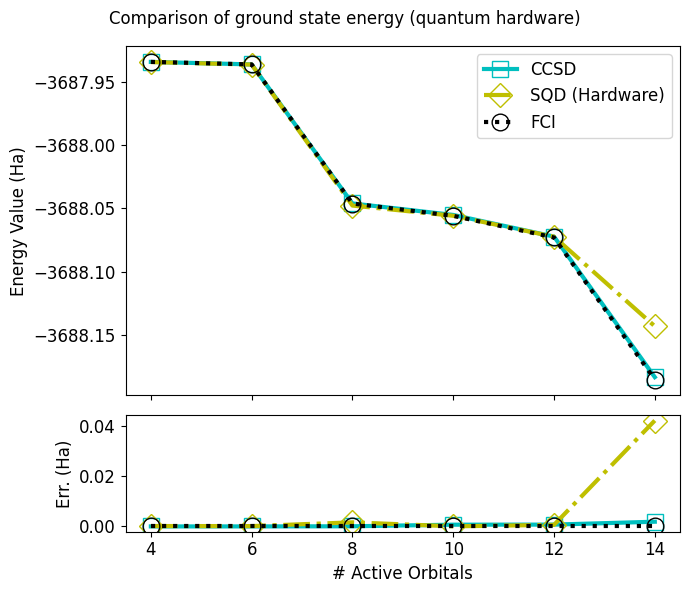

In [33]:
# Sample data (replace with real data)
x = ccsd_res[0]
ccsd = ccsd_res[1]
fci = fci_res[1]
sqd = np.array(sqd_energies)

# Datasets in a list
datasets = [
    ("CCSD", x[:6],  ccsd[:6], 's-', 'none', 'c'),
    # ("SQD", norbs, sqd, 'D-.', 'none', 'firebrick'),
    ("SQD (Hardware)", norbs, np.array(sqd_energies_hardware), 'D-.', 'none', 'y'),
    ("FCI", fci_res[0], fci, 'o:', 'none', 'black')
]

# Get colormap (e.g. tab10)
cmap = plt.get_cmap('tab10')

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6), gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.05)

# Plot energy values
for idx, (label,x, y, style, facecolor, linecolor) in enumerate(datasets):
    ax1.plot(x, y, style, label=label, color=linecolor, markerfacecolor=facecolor, markersize=12, linewidth=3)

ax1.set_ylabel("Energy Value (Ha)", fontsize=12)
ax1.legend(fontsize=12)
# ax1.grid(True)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)


# Compute and plot errors
ref = fci
for idx, (_,x, y, style, facecolor, linecolor) in enumerate(datasets):
    ax2.plot(x, np.abs(y - ref), style, color=linecolor, markerfacecolor=facecolor, markersize=12, linewidth=3)

ax2.set_xlabel("# Active Orbitals", fontsize=12)
ax2.set_ylabel("Err. (Ha)", fontsize=12)
# ax2.grid(True)

fig.suptitle("Comparison of ground state energy (quantum hardware)", fontsize=12)
plt.tight_layout()
plt.savefig('results/comp_hardware.png', dpi=300)

plt.show()


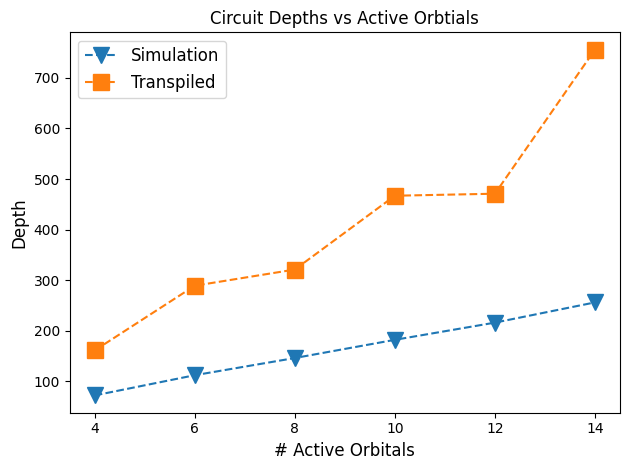

In [52]:
plt.plot(norbs, depth, 'v--', markersize=12, label='Simulation')
plt.plot(norbs, depth_hardware, 's--', markersize=12, label='Transpiled')
plt.legend(fontsize=12)
plt.title('Circuit Depths vs Active Orbtials')
plt.xlabel("# Active Orbitals", fontsize=12)
plt.ylabel("Depth", fontsize=12)
plt.tight_layout()
plt.savefig('results/depth.png', dpi=300)